<a href="https://colab.research.google.com/github/Naraendra-Reddy/Exploring-Seattle-Airbnb-Open-Data-Insights-and-Trends/blob/main/Exploring_Seattle_Airbnb_Open_Data_Insights_and_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Let's start by loading the necessary libraries and the Seattle Airbnb Open Data dataset into the Jupyter Notebook

Using the data, we are trying to solve, five important business questions:

1. What are the busiest times of the year to visit Seattle?
2. How does the price of a listing change throughout the year?
3. What are the most important factors that influence the price of an Airbnb listing in Seattle?
4. What is the relationship between the location of an Airbnb listing and its price?
5. What factors contribute to the popularity of Airbnb listings in Seattle?




In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
listings_df = pd.read_csv("listings.csv")
reviews_df = pd.read_csv("reviews.csv")
calendar_df = pd.read_csv("calendar.csv")


Next, let us perform some initial exploration of data

In [2]:
# Check the shape of the listings data
print("Listings Data Shape:", listings_df.shape)

# Check the data types of each column in the listings data
print("\n\nListings Data Types:")
print(listings_df.dtypes)

# View the first few rows of the listings data
print("\n\nListings Data:")
listings_df.head()


Listings Data Shape: (3818, 92)


Listings Data Types:
id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object


Listings Data:


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
# Check the shape of the reviews data
print("Reviews Data Shape:", reviews_df.shape)

# Check the data types of each column in the reviews data
print("\n\nReviews Data Types:")
print(reviews_df.dtypes)

# View the first few rows of the reviews data
print("\n\nReviews Data:")
reviews_df.head()


Reviews Data Shape: (84849, 6)


Reviews Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


Reviews Data:


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [12]:
# Check the shape of the calendar data
print("calendar Data Shape:", calendar_df.shape)

# Check the data types of each column in the calendar data
print("\n\ncalendar Data Types:")
print(reviews_df.dtypes)

# View the first few rows of the calendar data
print("\n\ncalendar Data:")
calendar_df.head()


calendar Data Shape: (1393570, 4)


calendar Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


calendar Data:


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Before moving onto the modeling and analysis phase, we have to clean and prepare the data. Cleaning and preparation involves tasks like handling missing values and categorical data, normalization, outlier detection, etc.

In [9]:
# Calendar missing values
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
#listings missing values
listings_df.isna().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [7]:
print(listings_df.isna().sum().index)
print(listings_df.isna().sum().values)
print(f"\n\n\ntotal missing values in listings data: {listings_df.isna().sum().sum()}")

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [8]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [7]:
# reviews missing values
reviews_df.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

### Handling missing data:

In the **calendar** data, about **32%** of the **price** variable data is missing. Eliminating that much data is not that great of a choice as it is a big proportion of the dataset. Furthermore, the data does not appear to be missing at random. The price values are missing almost always if not always when the **availability** values are "f". That is a pattern. It could result in bias.

The best way to handle the missing price values here is imputing with either mean or median values.

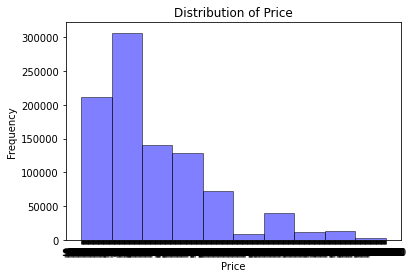

In [10]:

plt.hist(calendar_df['price'].dropna(), bins=10, alpha=0.5, color='blue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [15]:
calendar_df['price']

dtype('O')

In [12]:
calendar_df['price'].median()

TypeError: ignored

In [20]:
# change price dtype
calendar_df.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [21]:
#
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [1]:
reviews.describe()

NameError: ignored

In [21]:
temp_df=calendar_df.merge(listings_df, left_on="listing_id", right_on="id",  suffixes=("_calendar", "_listings"))

In [22]:
temp_df.head()

,listing_id,date,available,price_calendar,id,listing_url,scrape_id,last_scraped,name,summary,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,241032,2016-01-05,t,$85.00,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
2,241032,2016-01-06,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
3,241032,2016-01-07,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
4,241032,2016-01-08,f,NaN,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [28]:
temp_df[['price_calendar','price_listings']]

,price_calendar,price_listings
0,$85.00,$85.00
1,$85.00,$85.00
2,NaN,$85.00
3,NaN,$85.00
4,NaN,$85.00
...,...,...
1393565,NaN,$87.00
1393566,NaN,$87.00
1393567,NaN,$87.00
1393568,NaN,$87.00


In [29]:
temp_df['price_listings'].unique()

array(['$85.00', '$150.00', '$975.00', '$100.00', '$450.00', '$120.00',
       '$80.00', '$60.00', '$90.00', '$95.00', '$99.00', '$245.00',
       '$165.00', '$461.00', '$109.00', '$66.00', '$200.00', '$700.00',
       '$110.00', '$75.00', '$600.00', '$45.00', '$300.00', '$175.00',
       '$325.00', '$222.00', '$159.00', '$125.00', '$348.00', '$148.00',
       '$350.00', '$349.00', '$160.00', '$130.00', '$137.00', '$20.00',
       '$145.00', '$400.00', '$70.00', '$170.00', '$465.00', '$50.00',
       '$59.00', '$47.00', '$55.00', '$65.00', '$25.00', '$40.00',
       '$149.00', '$129.00', '$105.00', '$218.00', '$126.00', '$115.00',
       '$225.00', '$89.00', '$134.00', '$375.00', '$97.00', '$197.00',
       '$135.00', '$180.00', '$69.00', '$195.00', '$224.00', '$338.00',
       '$79.00', '$49.00', '$57.00', '$96.00', '$295.00', '$53.00',
       '$35.00', '$133.00', '$61.00', '$52.00', '$275.00', '$199.00',
       '$435.00', '$250.00', '$116.00', '$39.00', '$98.00', '$73.00',
       '$1

In [30]:
temp_df['price_calendar'].unique()

array(['$85.00', nan, '$125.00', '$154.00', '$164.00', '$165.00',
       '$150.00', '$145.00', '$144.00', '$148.00', '$155.00', '$149.00',
       '$156.00', '$166.00', '$152.00', '$147.00', '$146.00', '$151.00',
       '$158.00', '$168.00', '$169.00', '$192.00', '$175.00', '$162.00',
       '$171.00', '$173.00', '$153.00', '$177.00', '$183.00', '$181.00',
       '$170.00', '$179.00', '$167.00', '$184.00', '$186.00', '$172.00',
       '$180.00', '$190.00', '$178.00', '$196.00', '$197.00', '$202.00',
       '$198.00', '$205.00', '$214.00', '$218.00', '$211.00', '$193.00',
       '$204.00', '$189.00', '$187.00', '$194.00', '$185.00', '$206.00',
       '$191.00', '$207.00', '$208.00', '$188.00', '$200.00', '$209.00',
       '$210.00', '$195.00', '$201.00', '$199.00', '$203.00', '$182.00',
       '$163.00', '$159.00', '$157.00', '$142.00', '$136.00', '$134.00',
       '$137.00', '$143.00', '$135.00', '$141.00', '$130.00', '$138.00',
       '$133.00', '$129.00', '$127.00', '$126.00', '$131.0

In [31]:
temp_df.shape

(1393570, 96)

In [33]:
listings_df.shape

(3818, 92)

In [35]:
temp_df.duplicated().sum()

0

In [36]:
temp_df.isnull().sum()

listing_id                               0
date                                     0
available                                0
price_calendar                      459028
id                                       0
                                     ...  
cancellation_policy                      0
require_guest_profile_picture            0
require_guest_phone_verification         0
calculated_host_listings_count           0
reviews_per_month                   228855
Length: 96, dtype: int64

In [38]:
temp_df1=listings_df.merge(calendar_df, right_on="listing_id", left_on="id",  suffixes=( "_listings","_calendar"))

In [40]:
temp_df1.shape

(1393570, 96)

In [41]:
calendar_df.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [43]:
len(listings_df['id'].unique())

3818

In [44]:
len(calendar_df['listing_id'].unique())

3818

In [45]:
temp_df.isna().sum().sum()

11342963

In [46]:
listings_df.isna().sum().sum()

29819

In [47]:
calendar_df.isna().sum().sum()

459028